In [1]:
import glob
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
real = 'synthetic'
model_save = '/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/paper_figures'

In [3]:
model = "manopt"
path_manopt = f"/glade/scratch/ggantos/holodec/models/{model}/"
with open(f"{path_manopt}inference/{real}/{model}_particles.pkl", "rb") as input_file:
    particles_manopt = pickle.load(input_file)

try:
    h_idx_indices_manopt = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_manopt}/{real}/propagated/true*")])))
except:
    h_idx_indices_manopt = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_manopt}/{real}/propagated/true*")])))
print(f"h_idx_indices_manopt: {h_idx_indices_manopt}")


h_idx_indices_manopt: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
model = "optimized_noiseless"
path_optimized_noiseless = f"/glade/scratch/ggantos/holodec/models/{model}/"
model_loc_optimized_noiseless = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/{model}/"
with open(f"{path_optimized_noiseless}inference/{real}/particles.pkl", "rb") as input_file:
    particles_optimized_noiseless = pickle.load(input_file)

try:
    h_idx_indices_optimized_noiseless = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_optimized_noiseless}/{real}/propagated/true*")])))
except:
    h_idx_indices_optimized_noiseless = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_optimized_noiseless}/{real}/propagated/true*")])))
print(f"h_idx_indices_optimized_noiseless: {h_idx_indices_optimized_noiseless}")


FileNotFoundError: [Errno 2] No such file or directory: '/glade/scratch/ggantos/holodec/models/optimized_noiseless/inference/synthetic/particles.pkl'

In [5]:
bins = {'x': np.arange(-7300,7300,(7300--7300)//19),
        'y': np.arange(-4800,4800,(4800--4800)//19),
        'z': np.arange(14000,158000,(158000-14000)//20),
        'd': np.arange(0,100,(100-0)//18)}

widths = {'x': (7300--7300)//19,
          'y': (4800--4800)//19,
          'z': (158000-14000)//20,
          'd': (100-0)//18}

if 'real' in real:
    true_label = "Holosuite"
else:
    true_label = "True"


In [6]:
hist_avg_manopt = {}

for true in ('true', 'pred', 'orig', 'pred_2d', 'true_2d'):
    hist_avg_manopt[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in h_idx_indices_manopt:
            h, binEdges = np.histogram(particles_manopt[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_manopt[true][coord] = np.stack(hist)
        hist_avg_manopt[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_manopt[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_manopt) - 1) ** 0.5)


In [7]:
hist_avg_optimized_noiseless = {}

for true in ('true', 'pred', 'orig', 'pred_2d', 'true_2d'):
    hist_avg_optimized_noiseless[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in h_idx_indices_optimized_noiseless:
            h, binEdges = np.histogram(particles_optimized_noiseless[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_optimized_noiseless[true][coord] = np.stack(hist)
        hist_avg_optimized_noiseless[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_optimized_noiseless[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_optimized_noiseless) - 1) ** 0.5)


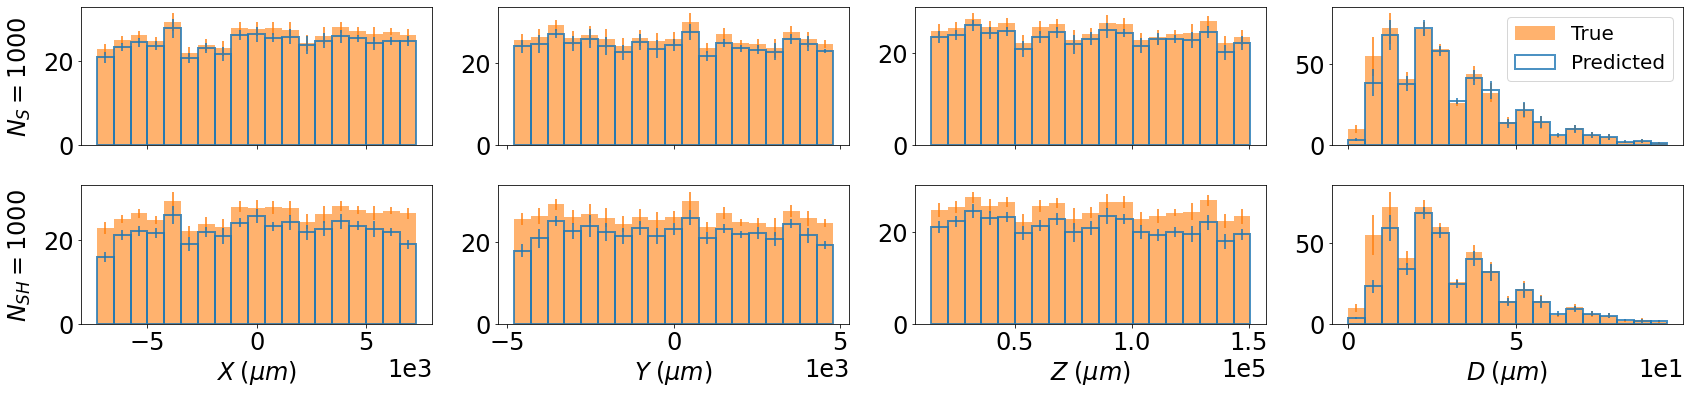

In [8]:
plt.rc('font', size=24)

fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[h_idx]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_optimized_noiseless['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_optimized_noiseless['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[0, i].bar(bincenters, hist_avg_optimized_noiseless['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_optimized_noiseless['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[1, i].bar(bincenters, hist_avg_manopt['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_manopt['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["$N_{S} = 1000$", "$N_{SH} = 1000$"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.0)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_NS_NSH.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_NS_NSH.png", bbox_inches = "tight", dpi=300)


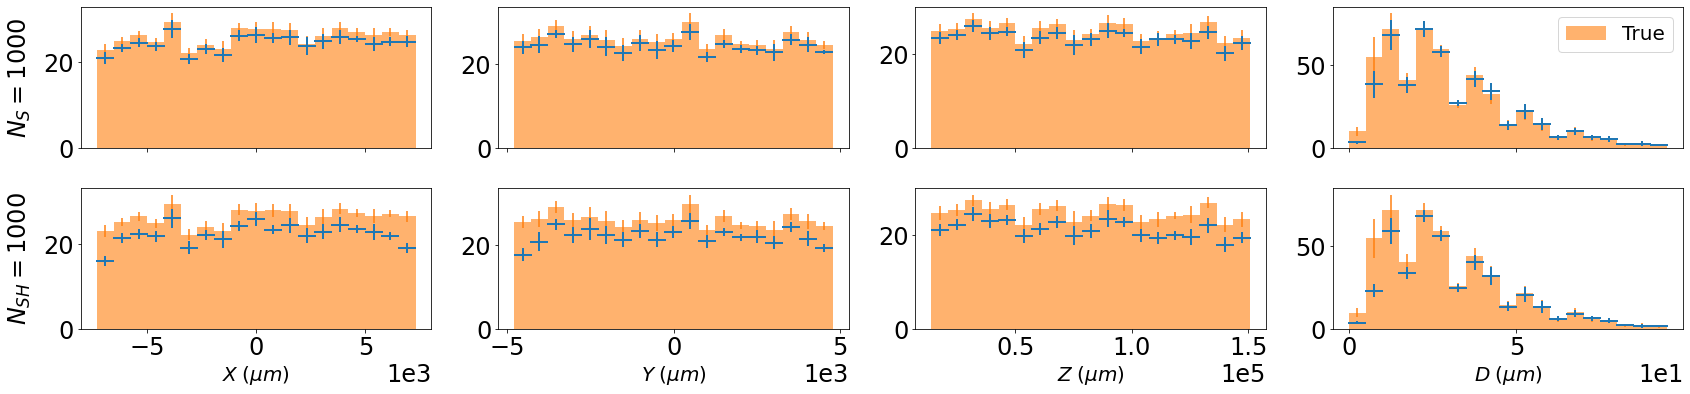

In [9]:
plt.rc('font', size=24)

fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[h_idx]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    bincenters_scatter = (binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_optimized_noiseless['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_optimized_noiseless['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e', zorder=0)
    ax[0, i].errorbar(bincenters, hist_avg_optimized_noiseless['pred_2d'][f'{coord}_mean'], yerr=hist_avg_optimized_noiseless['pred_2d'][f'{coord}_std'],
                      color='#1f77b4', fmt="_", ms=18, mew=2, elinewidth=2)
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e', zorder=0)
    ax[1, i].errorbar(bincenters, hist_avg_manopt['pred_2d'][f'{coord}_mean'], yerr=hist_avg_manopt['pred_2d'][f'{coord}_std'],
                      color='#1f77b4', fmt="_", ms=18, mew=2, elinewidth=2)
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["$N_{S} = 1000$", "$N_{SH} = 1000$"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col, fontsize=20)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, fontsize=24, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_NS_NSH_plus.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_NS_NSH_plus.png", bbox_inches = "tight", dpi=300)


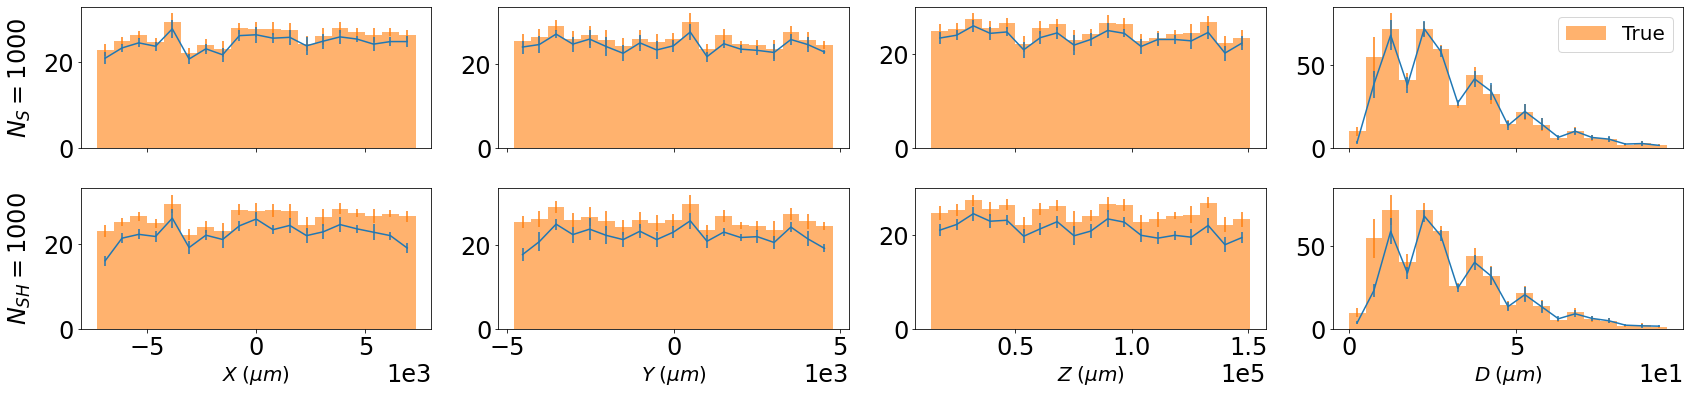

In [10]:
plt.rc('font', size=24)

fig, ax = plt.subplots(nrows=2, ncols=4, sharex='col', figsize=(24,6))
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[h_idx]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    bincenters_scatter = (binEdges[1:]+binEdges[:-1])
    ax[0, i].bar(bincenters, hist_avg_optimized_noiseless['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_optimized_noiseless['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e', zorder=0)
    ax[0, i].errorbar(bincenters, hist_avg_optimized_noiseless['pred_2d'][f'{coord}_mean'], yerr=hist_avg_optimized_noiseless['pred_2d'][f'{coord}_std'],
                      color='#1f77b4', fmt="-")
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e', zorder=0)
    ax[1, i].errorbar(bincenters, hist_avg_manopt['pred_2d'][f'{coord}_mean'], yerr=hist_avg_manopt['pred_2d'][f'{coord}_std'],
                      color='#1f77b4', fmt="-")
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["$N_{S} = 1000$", "$N_{SH} = 1000$"]
for a, col in zip(ax[1], cols):
    a.set_xlabel(col, fontsize=20)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, fontsize=24, labelpad=10)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_NS_NSH_error.pdf", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_NS_NSH_error.png", bbox_inches = "tight", dpi=300)


In [11]:
model = "100"
path_100 = f"/glade/scratch/ggantos/holodec/models/{model}/"
model_loc_100 = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/{model}/"
with open(f"{path_100}inference/{real}/particles.pkl", "rb") as input_file:
    particles_100 = pickle.load(input_file)

try:
    h_idx_indices_100 = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_100}/{real}/propagated/true*")])))
except:
    h_idx_indices_100 = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_100}/{real}/propagated/true*")])))
print(f"h_idx_indices_100: {h_idx_indices_100}")


h_idx_indices_100: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
model = "10000"
path_10000 = f"/glade/scratch/ggantos/holodec/models/{model}/"
model_loc_10000 = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/{model}/"
with open(f"{path_10000}inference/{real}/particles.pkl", "rb") as input_file:
    particles_10000 = pickle.load(input_file)
    
try:
    h_idx_indices_10000 = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_10000}/{real}/propagated/true*")])))
except:
    h_idx_indices_10000 = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_10000}/{real}/propagated/true*")])))
print(f"h_idx_indices_10000: {h_idx_indices_10000}")


h_idx_indices_10000: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:
model = "48648"
path_48648 = f"/glade/scratch/ggantos/holodec/models/{model}/"
model_loc_48648 = f"/glade/work/schreck/repos/HOLO/dev/holodec-ml/results/{model}/"
with open(f"{path_48648}inference/{real}/particles.pkl", "rb") as input_file:
    particles_48648 = pickle.load(input_file)
    
try:
    h_idx_indices_48648 = list(set(sorted([int(x.split("_")[1]) for x in glob.glob(f"{model_loc_48648}/{real}/propagated/true*")])))
except:
    h_idx_indices_48648 = list(set(sorted([int(x.split("_")[2]) for x in glob.glob(f"{model_loc_48648}/{real}/propagated/true*")])))
print(f"h_idx_indices_48648: {h_idx_indices_48648}")


h_idx_indices_48648: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
hist_avg_100 = {}

for true in ('true', 'pred', 'orig', 'pred_2d', 'true_2d'):
    hist_avg_100[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in h_idx_indices_100:
            h, binEdges = np.histogram(particles_100[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_100[true][coord] = np.stack(hist)
        hist_avg_100[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_100[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_100) - 1) ** 0.5)


In [15]:
hist_avg_10000 = {}

for true in ('pred_2d', 'true_2d'):
    hist_avg_10000[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in h_idx_indices_10000:
            h, binEdges = np.histogram(particles_10000[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_10000[true][coord] = np.stack(hist)
        hist_avg_10000[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_10000[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_10000) - 1) ** 0.5)


In [16]:
hist_avg_48648 = {}

for true in ('pred_2d', 'true_2d'):
    hist_avg_48648[true] = {}
    for coord in ['x', 'y', 'z', 'd']:
        hist = []
        for h_idx in h_idx_indices_48648:
            h, binEdges = np.histogram(particles_48648[h_idx][true][coord], bins=bins[coord])
            hist.append(h)
        hist_avg_48648[true][coord] = np.stack(hist)
        hist_avg_48648[true][coord+'_mean'] = np.stack(hist).mean(axis=0)
        hist_avg_48648[true][coord+'_std'] = np.stack(hist).std(axis=0) / ((len(h_idx_indices_48648) - 1) ** 0.5)


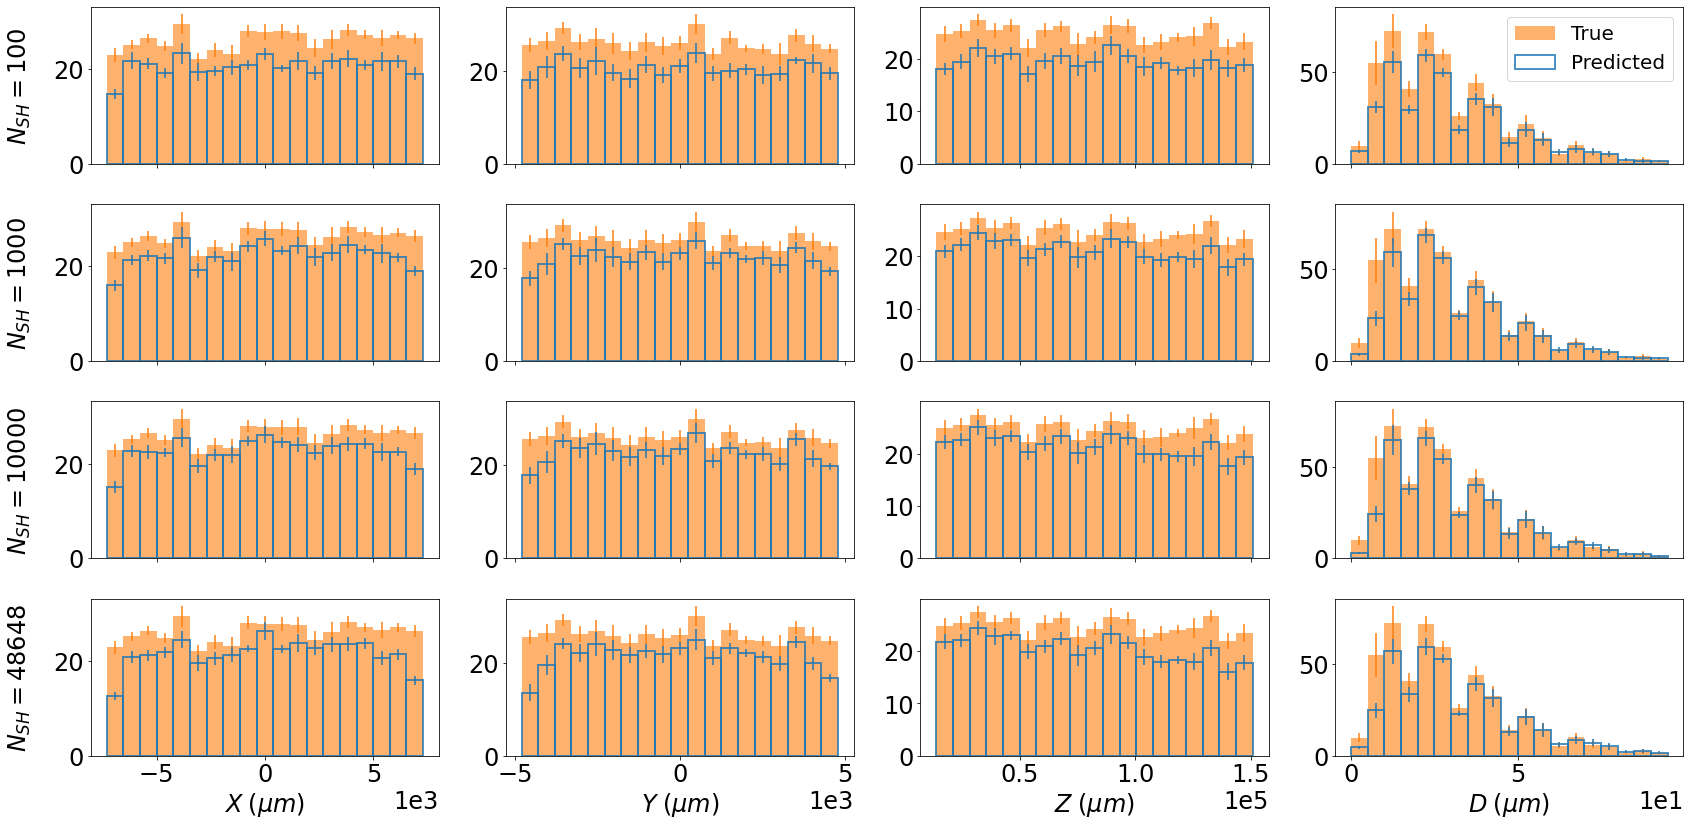

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=4, sharex='col', figsize=(24,12))
# fig.suptitle(f"Hologram {h_idx}", fontsize=16)
for i, coord in enumerate(['x', 'y', 'z', 'd']):
    _, binEdges = np.histogram(particles_manopt[h_idx]['pred_2d'][coord], bins=bins[coord])
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    
    ax[0, i].bar(bincenters, hist_avg_100['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_100['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[0, i].bar(bincenters, hist_avg_100['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_100['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[0, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    ax[1, i].bar(bincenters, hist_avg_manopt['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_manopt['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[1, i].bar(bincenters, hist_avg_manopt['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_manopt['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[1, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    ax[2, i].bar(bincenters, hist_avg_10000['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_10000['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[2, i].bar(bincenters, hist_avg_10000['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_10000['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4')
    ax[2, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    ax[3, i].bar(bincenters, hist_avg_48648['true_2d'][f'{coord}_mean'], alpha=0.6, width=widths[coord], yerr=hist_avg_48648['true_2d'][f'{coord}_std'], label=true_label,
            color='#ff7f0e', ecolor='#ff7f0e')
    ax[3, i].bar(bincenters, hist_avg_48648['pred_2d'][f'{coord}_mean'], alpha=0.8, width=widths[coord], yerr=hist_avg_48648['pred_2d'][f'{coord}_std'], label='Predicted',
            fill=False, linewidth=2, edgecolor='#1f77b4', ecolor='#1f77b4') 
    ax[3, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
cols = ["$X\;({\mu}m)$", "$Y\;({\mu}m)$", "$Z\;({\mu}m)$", "$D\;({\mu}m)$"]
rows = ["$N_{SH} = 100$", "$N_{SH} = 1000$", "$N_{SH} = 10000$", "$N_{SH} = 48648$"]
for a, col in zip(ax[3], cols):
    a.set_xlabel(col)
for a, row in zip(ax[:,0], rows):
    a.set_ylabel(row, rotation=90, labelpad=20)

ax[0,3].legend(fontsize=20)
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()
fig.show()
fig.savefig(f"paper_figures/hist_100_1000_10000_48648.png", bbox_inches = "tight", dpi=300)
fig.savefig(f"paper_figures/hist_100_1000_10000_48648.pdf", bbox_inches = "tight", dpi=300)
